In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats.mstats import winsorize
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
import seaborn as sns

In [ ]:
# Load data
data = pd.read_csv("raw_data/creditcard.csv")
df = data.copy()

# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Extract transaction hour and apply cyclical transformation
df["Hour"] = (df["Time"] // 3600) % 24
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df.drop(columns=["Hour", "Time"], inplace=True)  # Drop raw 'Time' column

# Define features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ("scaler", RobustScaler()),  # RobustScaler is good for outliers in PCA features
])

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Apply SMOTE for class balancing
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Apply Tomek Links for cleaning
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_smote, y_train_smote)

print("Final class distribution after preprocessing:", Counter(y_final))


In [ ]:
# Load data
data = pd.read_csv("raw_data/creditcard.csv")
df = data.copy()

# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Extract transaction hour and apply cyclical transformation
df["Hour"] = (df["Time"] // 3600) % 24
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df.drop(columns=["Hour", "Time"], inplace=True)  # Drop raw 'Time' column

# Define features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define preprocessing pipeline
preprocessor = Pipeline([
    ("scaler", RobustScaler()),  # RobustScaler is good for outliers in PCA features
])

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Apply SMOTE for class balancing
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Apply Tomek Links for cleaning
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_smote, y_train_smote)

print("Final class distribution after preprocessing:", Counter(y_final))


In [3]:

data1 = pd.read_csv('raw_data/creditcard.csv')
df = data1.copy()

# Remove duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Extract transaction hour and apply cyclical transformation
df['Hour'] = (df['Time'] // 3600) % 24
# Apply cyclical transformation
df["Hour_sin"] = np.sin(2 * np.pi * df["Hour"] / 24)
df["Hour_cos"] = np.cos(2 * np.pi * df["Hour"] / 24)
df.drop(columns=["Hour", "Time"], inplace=True)

# Define features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Original class distribution befor SMOTE in first part:", Counter(y))

# Apply BorderlineSMOTE (instead of regular SMOTE)
smote = BorderlineSMOTE(sampling_strategy=0.3, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Original class distribution after SMOTE in first part:", Counter(y_train_smote))

#y_train_smote= pd.DataFrame(y_train_smote)

scaler = RobustScaler()
X_train_smote.iloc[:, 1:29] = scaler.fit_transform(X_train_smote.iloc[:, 1:29])
X_test.iloc[:, 1:29] = scaler.transform(X_test.iloc[:, 1:29])
X_val.iloc[:, 1:29] = scaler.transform(X_val.iloc[:, 1:29])

columns_to_winsorize = ["V8", "V18", "V21", "V27", "V28"]
for col in columns_to_winsorize:
    X_train_smote[col] = winsorize(X_train_smote[col], limits=[0.01, 0.01])
    X_test[col] = winsorize(X_test[col], limits=[0.01, 0.01])
    X_val[col] = winsorize(X_val[col], limits=[0.01, 0.01])

X_train_smote['V20'] = np.log(X_train_smote['V20'].clip(lower=0.0001))
X_train_smote['V23'] = np.log(X_train_smote['V23'].clip(lower=0.0001))
X_test['V20'] = np.log(X_test['V20'].clip(lower=0.0001))
X_test['V23'] = np.log(X_test['V23'].clip(lower=0.0001))
X_val['V20'] = np.log(X_val['V20'].clip(lower=0.0001))
X_val['V23'] = np.log(X_val['V23'].clip(lower=0.0001))

X_train_smote["Amount"] = np.log1p(X_train_smote["Amount"])  # log(1 + Amount) to handle zero values
X_test["Amount"] = np.log1p(X_test["Amount"])  # log(1 + Amount) to handle zero values
X_val["Amount"] = np.log1p(X_val["Amount"])


scaler = StandardScaler()
X_train_smote["Amount"] = scaler.fit_transform(X_train_smote[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])
X_val["Amount"] = scaler.transform(X_val[["Amount"]])

X_train_smote["Amount"] = winsorize(X_train_smote["Amount"], limits=[0.01, 0.01])
X_test["Amount"] = winsorize(X_test["Amount"], limits=[0.01, 0.01])
X_val["Amount"] = winsorize(X_val["Amount"], limits=[0.01, 0.01])

# Ensure all features are scaled if necessary (PCA is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

"""n_components = 24
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)"""

print("Original class distribution befor Tomek:", Counter(y_train_smote))


# Apply Tomek Links only if class imbalance remains
tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_train_scaled, y_train_smote)

# Check final class distribution
print("After Tomek Links:", Counter(y_final))


Original class distribution befor SMOTE in first part: Counter({0: 283253, 1: 473})
Original class distribution after SMOTE in first part: Counter({0: 212439, 1: 63731})
Original class distribution befor Tomek: Counter({0: 212439, 1: 63731})
After Tomek Links: Counter({0: 212432, 1: 63731})


In [4]:
X_train = pd.DataFrame(X_final, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X.columns)

In [5]:
X_val.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour_sin',
       'Hour_cos'],
      dtype='object')

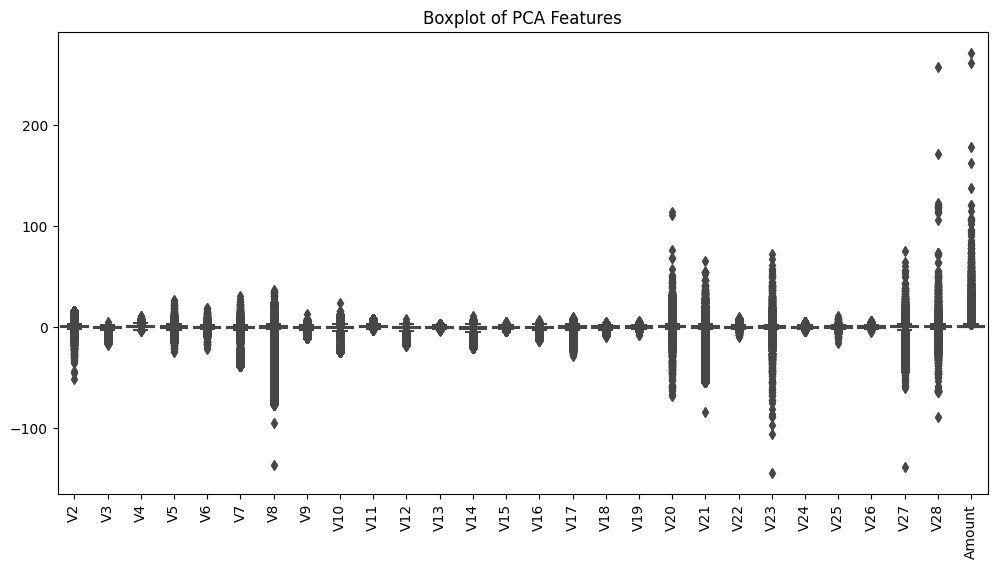

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_smote.iloc[:, 1:29])  # Excluding 'Time', 'Amount', 'Hour', 'Class'
plt.xticks(rotation=90)
plt.title("Boxplot of PCA Features")
plt.show()


In [ ]:
X_final = pd.DataFrame(X_final)

In [14]:
y_final = y_final.values.ravel()
X_final = X_final.values.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [6]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the Balanced Random Forest model
model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_final)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


/home/mahdi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but BalancedRandomForestClassifier was fitted with feature names
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     35410
           1       0.85      0.79      0.81        56

    accuracy                           1.00     35466
   macro avg       0.92      0.89      0.91     35466
weighted avg       1.00      1.00      1.00     35466

AUC-ROC Score: 0.8927441804171541


In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# Randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_final, y_final)

print("Best parameters:", random_search.best_params_)

# Evaluate best model
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("Updated Classification Report:\n", classification_report(y_test, y_pred_best))
print("Updated AUC-ROC Score:", roc_auc_score(y_test, y_pred_best))


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mahdi/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mahdi/.pyenv/versions/lewagon/lib/python3.10/site-packages/imblearn/ensemble/_forest.py", line 501, in fit
    self._validate_estimator()
  File "/home/mahdi/.pyenv/versions/lewagon/lib/python3.10/site-packages/imblearn/ensemble/_forest.py", line 389, in _validate_estimator
    self.base_estimator_ = clone(self.base_estimator)
  File "/home/mahdi/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 76, in clone
    return _clone_parametrized(estimator, safe=safe)
  File "/home/mahdi/.pyenv/versions/lewagon/lib/python3.10/site-packages/sklearn/base.py", line 98, in _clone_parametrized
    raise TypeError(
TypeError: Cannot clone object ''deprecated'' (type <class 'str'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.


In [ ]:
import shap

# Initialize SHAP Explainer
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_scaled)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


In [ ]:
import joblib

# Save model
joblib.dump(best_model, "fraud_detection_model.pkl")

# Load model for future use
model_loaded = joblib.load("fraud_detection_model.pkl")


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost with imbalance handling
xgb_model = XGBClassifier(
    scale_pos_weight=10,  # Helps in handling class imbalance
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

# Train the model
xgb_model.fit(X_final, y_final)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred_xgb))


In [4]:
from lightgbm import LGBMClassifier

# Initialize LightGBM
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.05,
    n_estimators=200,
    scale_pos_weight=10,  # Handles class imbalance
    random_state=42
)

# Train the model
lgbm_model.fit(X_final, y_final)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred_lgbm))


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the autoencoder architecture
input_dim = X_final.shape[1]

autoencoder = models.Sequential([
    layers.Dense(24, activation='relu', input_shape=(input_dim,)),
    layers.Dense(12, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')  # Output should match input
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on non-fraud data
autoencoder.fit(X_final[y_final == 0], X_final[y_final == 0], epochs=10, batch_size=32)

# Reconstruction loss can help detect fraud
reconstruction = autoencoder.predict(X_test_scaled)
reconstruction_loss = tf.keras.losses.mean_squared_error(X_test_scaled, reconstruction)
threshold = np.percentile(reconstruction_loss, 95)  # Set threshold at 95% percentile

fraud_predictions = (reconstruction_loss > threshold).astype(int)

# Evaluate
print(classification_report(y_test, fraud_predictions))


In [ ]:
import joblib

# Save the trained model
joblib.dump(best_model, "fraud_detection_model.pkl")

# Save the preprocessing pipeline as well
joblib.dump(preprocessor, "preprocessing_pipeline.pkl")

print("Model and preprocessing pipeline saved successfully!")


In [ ]:
pip install fastapi uvicorn joblib pandas numpy
uvicorn main:app --host 0.0.0.0 --port 8000 --reload


In [ ]:
from fastapi import FastAPI
import joblib
import numpy as np
import pandas as pd
from pydantic import BaseModel

# Load the trained model and preprocessing pipeline
model = joblib.load("fraud_detection_model.pkl")
preprocessor = joblib.load("preprocessing_pipeline.pkl")

# Initialize FastAPI app
app = FastAPI()

# Define the request format
class Transaction(BaseModel):
    V1: float
    V2: float
    V3: float
    V4: float
    V5: float
    V6: float
    V7: float
    V8: float
    V9: float
    V10: float
    V11: float
    V12: float
    V13: float
    V14: float
    V15: float
    V16: float
    V17: float
    V18: float
    V19: float
    V20: float
    V21: float
    V22: float
    V23: float
    V24: float
    V25: float
    V26: float
    V27: float
    V28: float
    Amount: float
    Hour: int

@app.get("/")
def home():
    return {"message": "Credit Card Fraud Detection API is running!"}

@app.post("/predict")
def predict(transaction: Transaction):
    # Convert input data to DataFrame
    input_data = pd.DataFrame([transaction.dict()])

    # Apply preprocessing
    input_scaled = preprocessor.transform(input_data)

    # Make prediction
    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)[:, 1]

    return {
        "fraud_prediction": int(prediction[0]),
        "fraud_probability": float(prediction_proba[0])
    }
